# Lab KF5 - Radiation in the environment

*This document is to help you perform the analysis. In order to save changes that you make, remember to save the document before closing it! You may include it as an appendix to your lab reports and it will not counts towards the max. 10 pages limit* 

**In the code cells, whenever you see the comment " -> TODO <- " This means that you need to edit or add something to that row in the code. Read the relevant comment which follows.**

### Importing python packages <a name="import"></a>

In [5]:
!pip install uncertainties

In [7]:
#This code cell holds useful code neede for the analysis. Execute it like normal.
# Packages to help importing files 
import sys, os

# Package that supports working with large arrays
import numpy as np  
import pandas as pd

# math
from math import sqrt

# Package for plotting 
import matplotlib   # choose a backend for web applications; remove for stand-alone applications:
matplotlib.use('Agg') # enable interactive notebook plots (alternative: use 'inline' instead of 'notebook'/'widget' for static images)
%matplotlib notebook

# The following line is the ONLY one needed in stand-alone applications!
import matplotlib.pyplot as plt

# Function that fits a curve to data 
from scipy.optimize import curve_fit

# For uncertainties calculations
from uncertainties import ufloat, ufloat_fromstr, unumpy
from uncertainties.umath import * # sin(), etc...

# Custom pakages prepared for you to analyze experimental data from labs.
# The code is located in the 'lib' subfolder which we have to specify:
sys.path.append('../lib')
import MCA, fittingFunctions

# Part 1: Ambient dose measurement

Please estimate **properly** the average of your measurements. You can refer to the `Uncertainties` Jyputer notebook on how to avegare quantities which include _different_ uncertainties.
 

## Task 1.3 Analysis of the dose measurement results 

In [15]:
#-> TODO <- Compute the average of the Ambient dose measurements for each location.

indoor_radiation = [
    (0.15 + 0.14 + 0.11 + 0.14) / 4,  # indoor_common (average)
    0.065,                              # indoor_medical
    0.11                                # indoor_cafe
]

outdoor_radiation = [(0.15 + 0.13+0.13+0.13)/4, 
                    0.15,
                    0.10
                    ]

In [5]:
#-> TODO <- Compute the annual effective dose rate [mSv/y] on each location

import numpy as np

# Original data in µSv/h
indoor_radiation = np.array([0.11, 0.14, 0.065, 0.11])  # or use a list

# Convert to mSv/year
conversion_factor = 24 * 365.25 / 1000  # ≈ 8.766
annual_dose = indoor_radiation * conversion_factor

print(f"Annual doses (mSv/year): {annual_dose}")

outdoor_radiation = np.array([0.135, 0.15, 0.10])  # µSv/h
annual_dose = outdoor_radiation * 8.766             # Convert to mSv/year

print(f"Annual outdoor doses (mSv/year): {np.round(annual_dose, 3)}")

Annual doses (mSv/year): [0.96426 1.22724 0.56979 0.96426]
Annual outdoor doses (mSv/year): [1.183 1.315 0.877]


In [19]:
#-> TODO <- Estimate the contribution from radon (%) to the dose you measured indoors. 
import numpy as np

indoor_value = 38
conversion_factor = 6.7e-6 * 24 * 365.25
Annual_doses =  np.array([1.18341, 0.56979, 0.96426])
    
radon_dose = indoor_value * conversion_factor
radon_percent = (radon_dose / Annual_doses) * 100

print(f"Radon Dose {radon_dose}")
print(f"Radon contributes ~{radon_percent}% to the indoor dose.")

Radon Dose 2.2318236000000002
Radon contributes ~[188.59259259 391.69230769 231.45454545]% to the indoor dose.


# Part 2 : $\alpha$ Spectrometry

## Task 2.2: Calibrate Detector

### Step 7: Import your data and plot the spectrum in Jupyter Notebook

In [25]:
#Load your data files here:
Th228 = MCA.load_spectrum("/Users/Yash/Downloads/FYSC 22/Lab/KF5/KF5/Th228-160425.Spe") #-> TODO <- Insert the name of your data file. Source: Th-228

In [27]:
#Execute this cell to make plot of Th-228 spectra

#### NO NEED TO EDIT ####
plt.figure(0, figsize=(10, 6)) #make figure for Th-228 data.
plt.step(Th228.bin_centers, Th228.counts, where='mid', label='step') #make a stepped plot
plt.title("Th-228 spectrum measured by Si surface barrier detector") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.yscale('log')          # show the y-axis in logarithmic scale
plt.ylim(ymin=1)           # used to limit the minimum value shown on the y-axis
#plt.savefig("test_spectrum.png") #This is how you can save the figure
#########################

<IPython.core.display.Javascript object>

(1.0, 111.3)

### Step 8: Fit a Gaussian function to the relevant peaks and save the centroid values (we will use these for calibration in the next task).

A gaussian function looks like this:
$$G(x) = A\cdot e^{\frac{(x-\mu)^2}{2\sigma^2}}$$
where
- $A$ is a constant determing the amplitude of the peak, 
- $\mu$ is the mean value of the peak (centroid),
- $\sigma$ is the standard diviation of the peak (width of the peak).

<IPython.core.display.Javascript object>


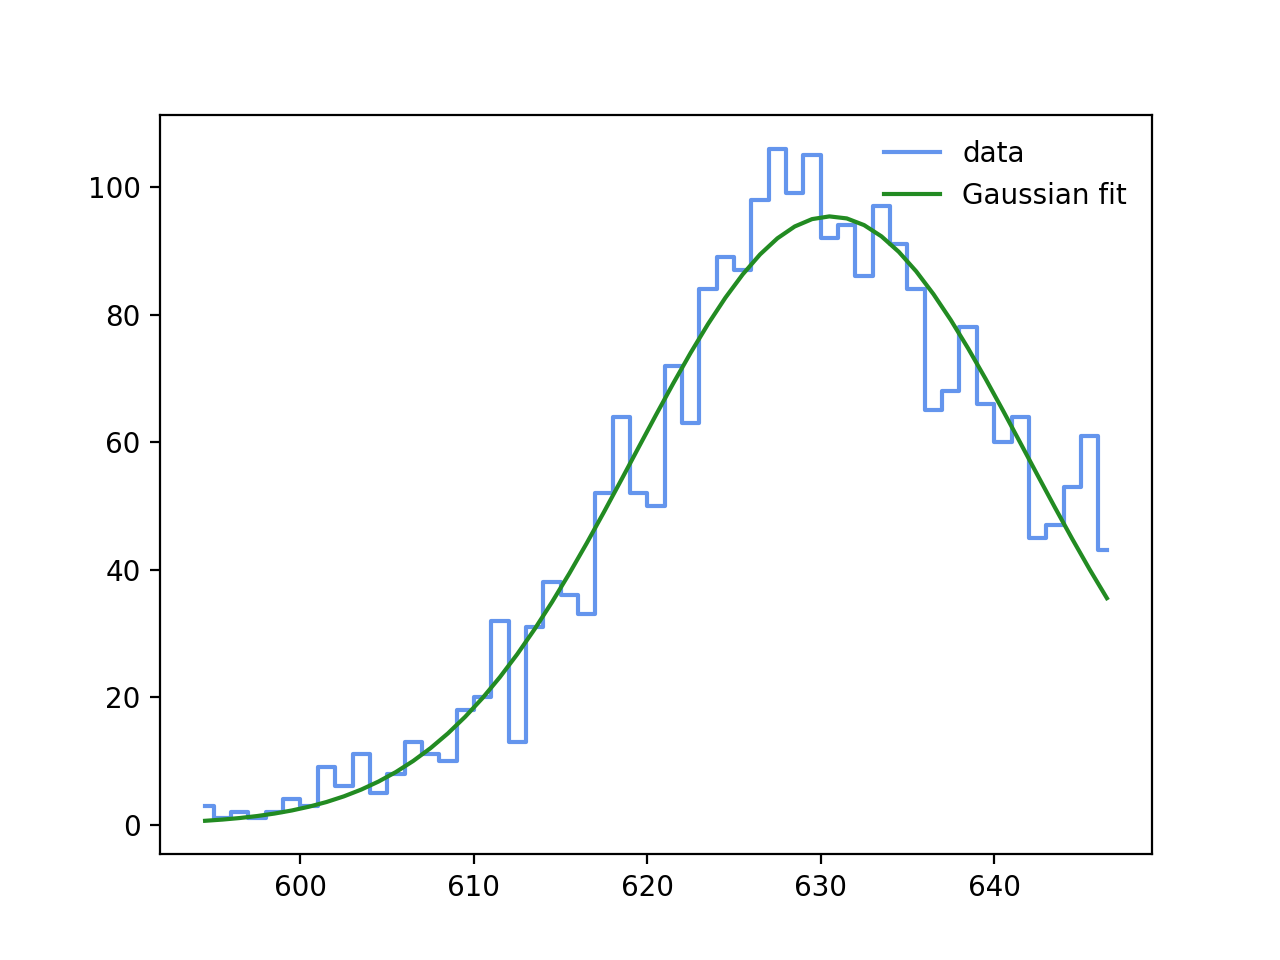

Estimated parameters:
 A = 95.40048, mu = 630.57220,  sigma = 11.33026 

Uncertainties in the estimated parameters: 
 σ²(A) = 4.42427, σ²(mu) = 0.09385, σ²(sigma) = 0.11536 

Covariance matrix: 
 [[ 4.42427242 -0.06304867 -0.42903626]
 [-0.06304867  0.09385413  0.02401157]
 [-0.42903626  0.02401157  0.11535729]]


In [8]:
# Fitting the 1st peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
first_peak = fittingFunctions.perform_Gaussian_fit(x=Th228.bin_centers, # your x data 
                                              y=Th228.counts,           # your y data 
                                              region_start=594,   # -> TODO <- Insert channel number from where to START fitting.
                                              region_stop=647,    # -> TODO <- Insert channel number from where to STOP fitting.
                                              mu_guess=627.9,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
                                              A_guess=107,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
                                              sigma_guess=22)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

<IPython.core.display.Javascript object>


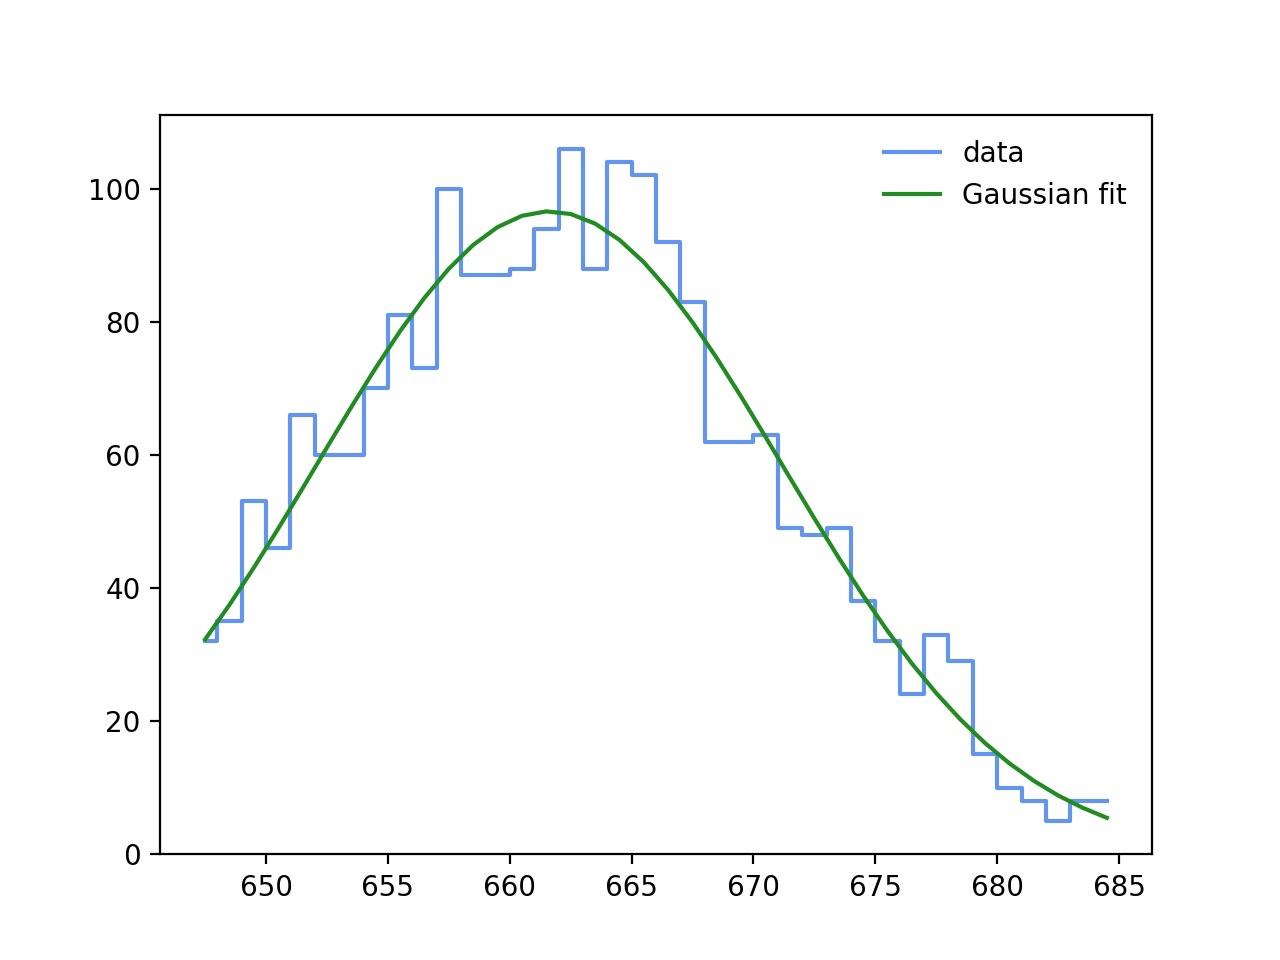

Estimated parameters:
 A = 96.60259, mu = 661.62637,  sigma = 9.53698 

Uncertainties in the estimated parameters: 
 σ²(A) = 4.66781, σ²(mu) = 0.06545, σ²(sigma) = 0.08116 

Covariance matrix: 
 [[ 4.66780987  0.04361959 -0.37176644]
 [ 0.04361959  0.06545155 -0.01322763]
 [-0.37176644 -0.01322763  0.08115953]]


In [9]:
# Fitting the 2nd peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
second_peak = fittingFunctions.perform_Gaussian_fit(x=Th228.bin_centers, # your x data 
                                              y=Th228.counts,           # your y data 
                                              region_start=647,   # -> TODO <- Insert channel number from where to START fitting.
                                              region_stop=685,    # -> TODO <- Insert channel number from where to STOP fitting.
                                              mu_guess=662.5,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
                                              A_guess=107,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
                                              sigma_guess=20)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

<IPython.core.display.Javascript object>


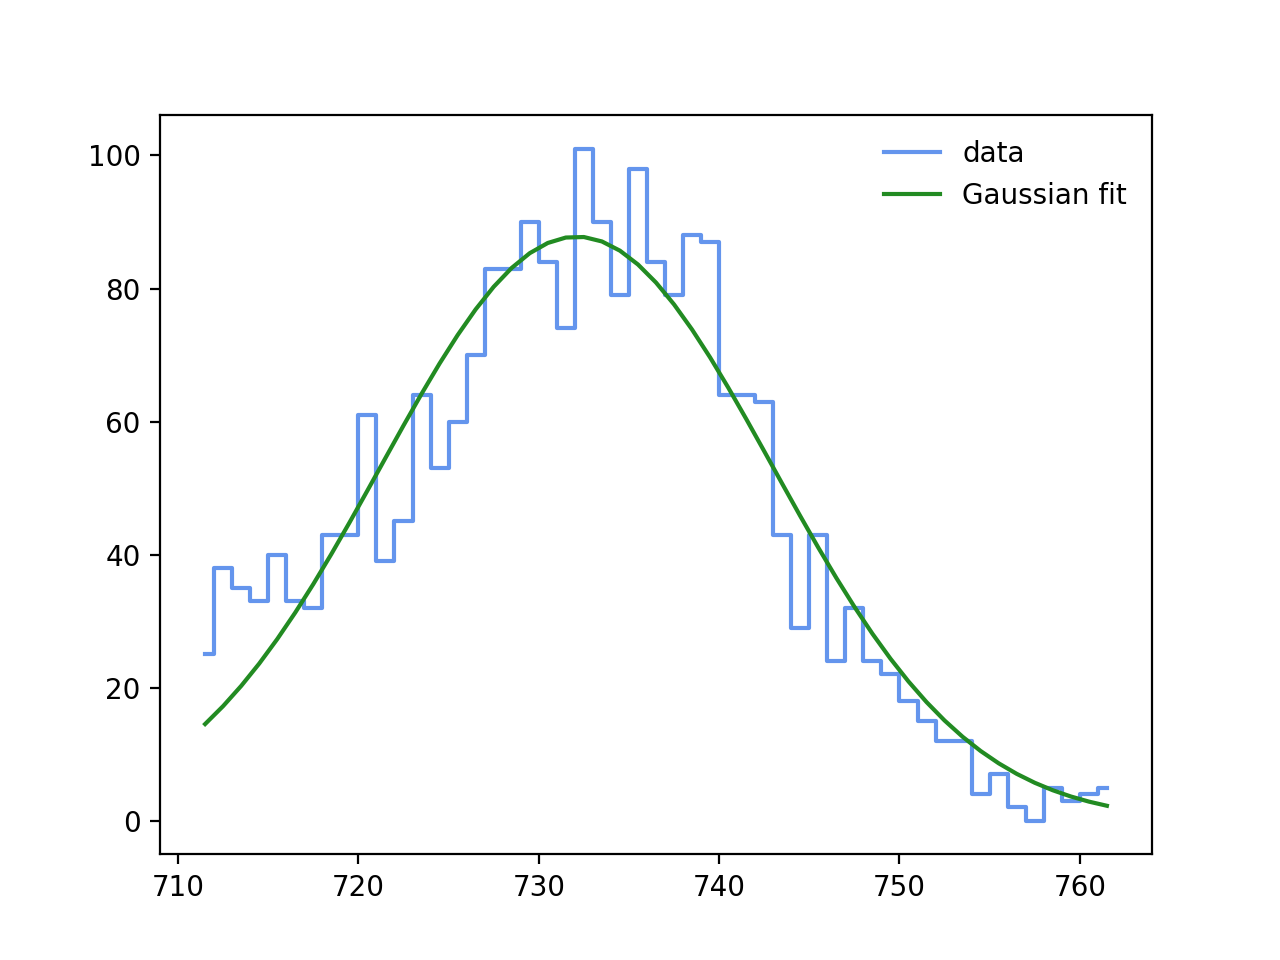

Estimated parameters:
 A = 87.79841, mu = 732.10376,  sigma = 10.86457 

Uncertainties in the estimated parameters: 
 σ²(A) = 6.63851, σ²(mu) = 0.13628, σ²(sigma) = 0.14990 

Covariance matrix: 
 [[ 6.63850653  0.02530101 -0.58953493]
 [ 0.02530101  0.13627526 -0.00819929]
 [-0.58953493 -0.00819929  0.14989992]]


In [22]:
# Fitting the 3rd peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
third_peak = fittingFunctions.perform_Gaussian_fit(x=Th228.bin_centers, # your x data 
                                              y=Th228.counts,           # your y data 
                                              region_start=710.5,   # -> TODO <- Insert channel number from where to START fitting.
                                              region_stop=762,    # -> TODO <- Insert channel number from where to STOP fitting.
                                              mu_guess=732.5,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
                                              A_guess=101.5,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
                                              sigma_guess=23)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

<IPython.core.display.Javascript object>


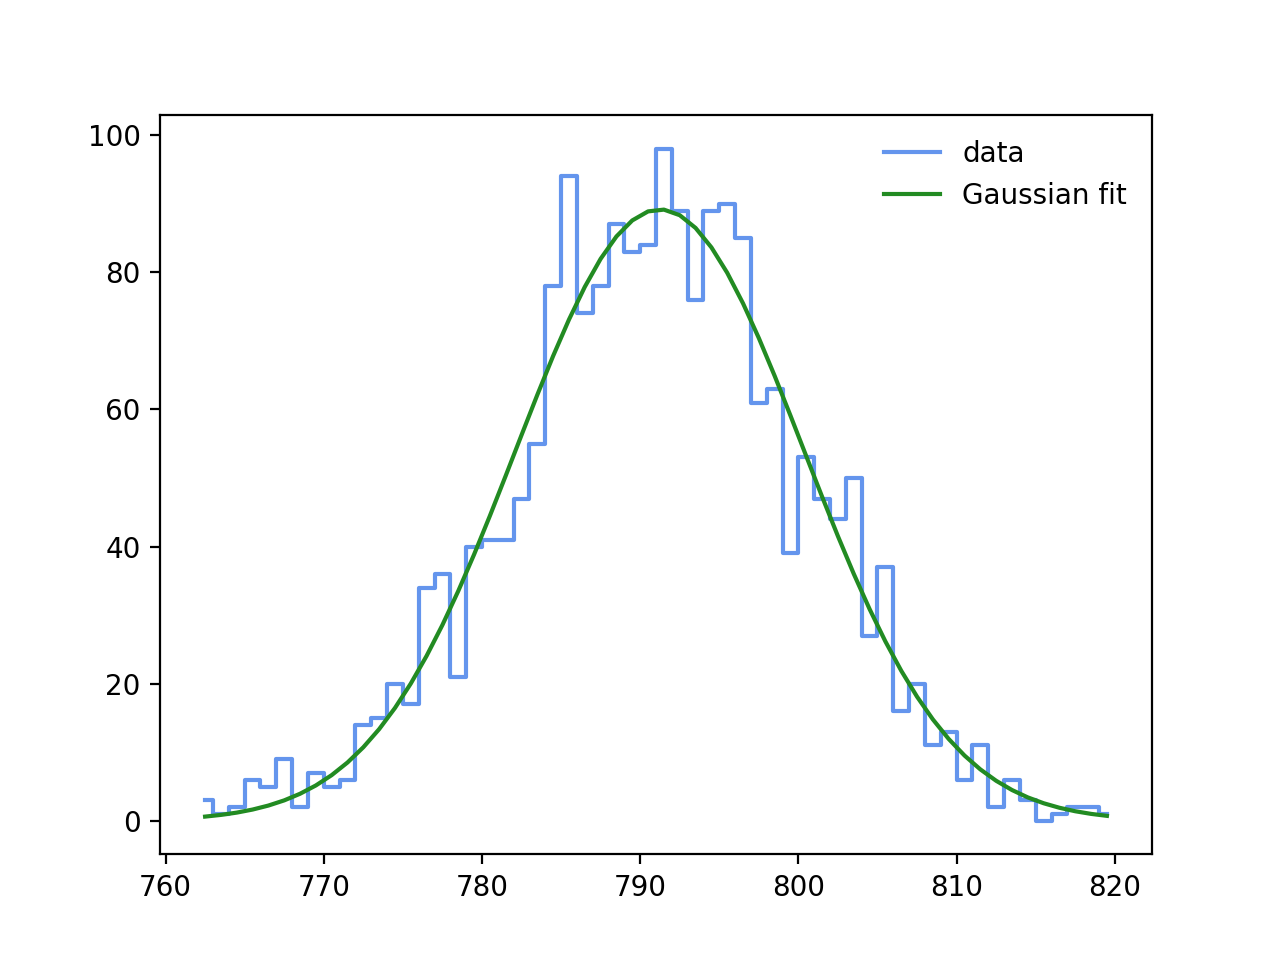

Estimated parameters:
 A = 89.16652, mu = 791.23971,  sigma = 9.10465 

Uncertainties in the estimated parameters: 
 σ²(A) = 4.44880, σ²(mu) = 0.06183, σ²(sigma) = 0.06191 

Covariance matrix: 
 [[ 4.44879788e+00 -1.88895492e-05 -3.03128402e-01]
 [-1.88895492e-05  6.18287961e-02  4.35151260e-06]
 [-3.03128402e-01  4.35151260e-06  6.19127144e-02]]


In [21]:
# Fitting the 4th peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
fourth_peak = fittingFunctions.perform_Gaussian_fit(x=Th228.bin_centers, # your x data 
                                              y=Th228.counts,           # your y data 
                                              region_start=761.5,   # -> TODO <- Insert channel number from where to START fitting.
                                              region_stop=820,    # -> TODO <- Insert channel number from where to STOP fitting.
                                              mu_guess=790,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
                                              A_guess=98,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
                                              sigma_guess=22)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

<IPython.core.display.Javascript object>


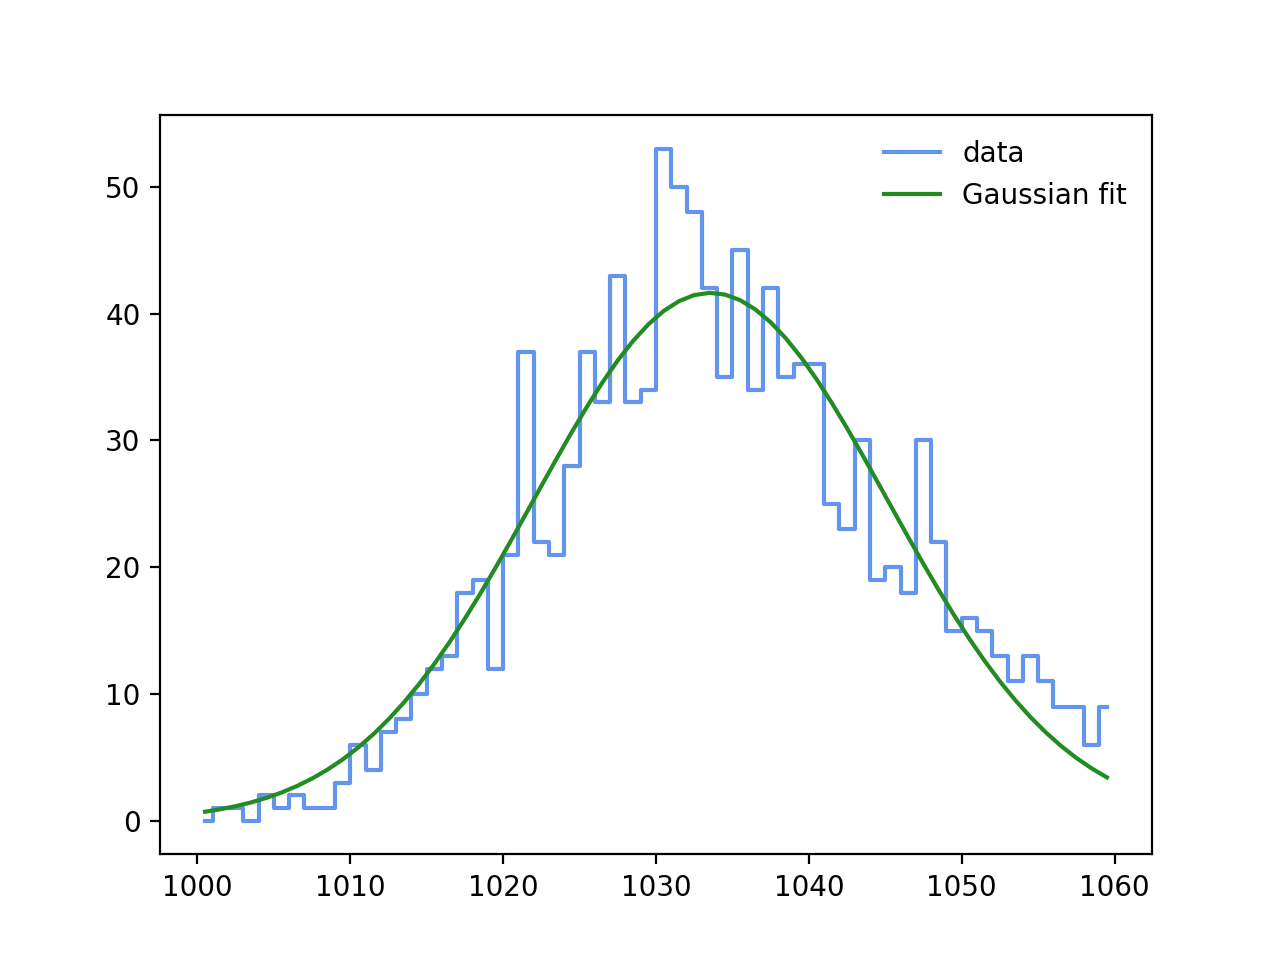

Estimated parameters:
 A = 41.63959, mu = 1033.56937,  sigma = 11.60052 

Uncertainties in the estimated parameters: 
 σ²(A) = 1.71396, σ²(mu) = 0.17697, σ²(sigma) = 0.18372 

Covariance matrix: 
 [[ 1.71395653 -0.00454915  0.32723446]
 [-0.00454915  0.17696807 -0.00308819]
 [ 0.32723446 -0.00308819  0.18372268]]


In [20]:
# Fitting the 5th peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
fifth_peak = fittingFunctions.perform_Gaussian_fit(x=Th228.bin_centers, # your x data 
                                              y=Th228.counts,           # your y data 
                                              region_start=1000,   # -> TODO <- Insert channel number from where to START fitting.
                                              region_stop=1060,    # -> TODO <- Insert channel number from where to STOP fitting.
                                              mu_guess=1030,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
                                              A_guess=53,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
                                              sigma_guess=35)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

### Step 9: Create an energy calibration curve. 

Recall that the energy calibration is the linear dependence between the ADC channel number and the energies of the identified full-energy peaks. It is performed with a linear function.

A linear function looks like:
$$Energy = k \cdot Channel + m$$
where;
- $k$ determines the slope of the curve,
- $m$ determined the intersection of the y-axis.

Find calibration constants for Si detector: 

Alpha energies [MeV]: [5.42 5.68 6.28 6.78 8.78]
Fitted centroid values [ADC]: [ 630.57220297  661.62636689  732.10376086  791.23971227 1033.56936818]


<IPython.core.display.Javascript object>


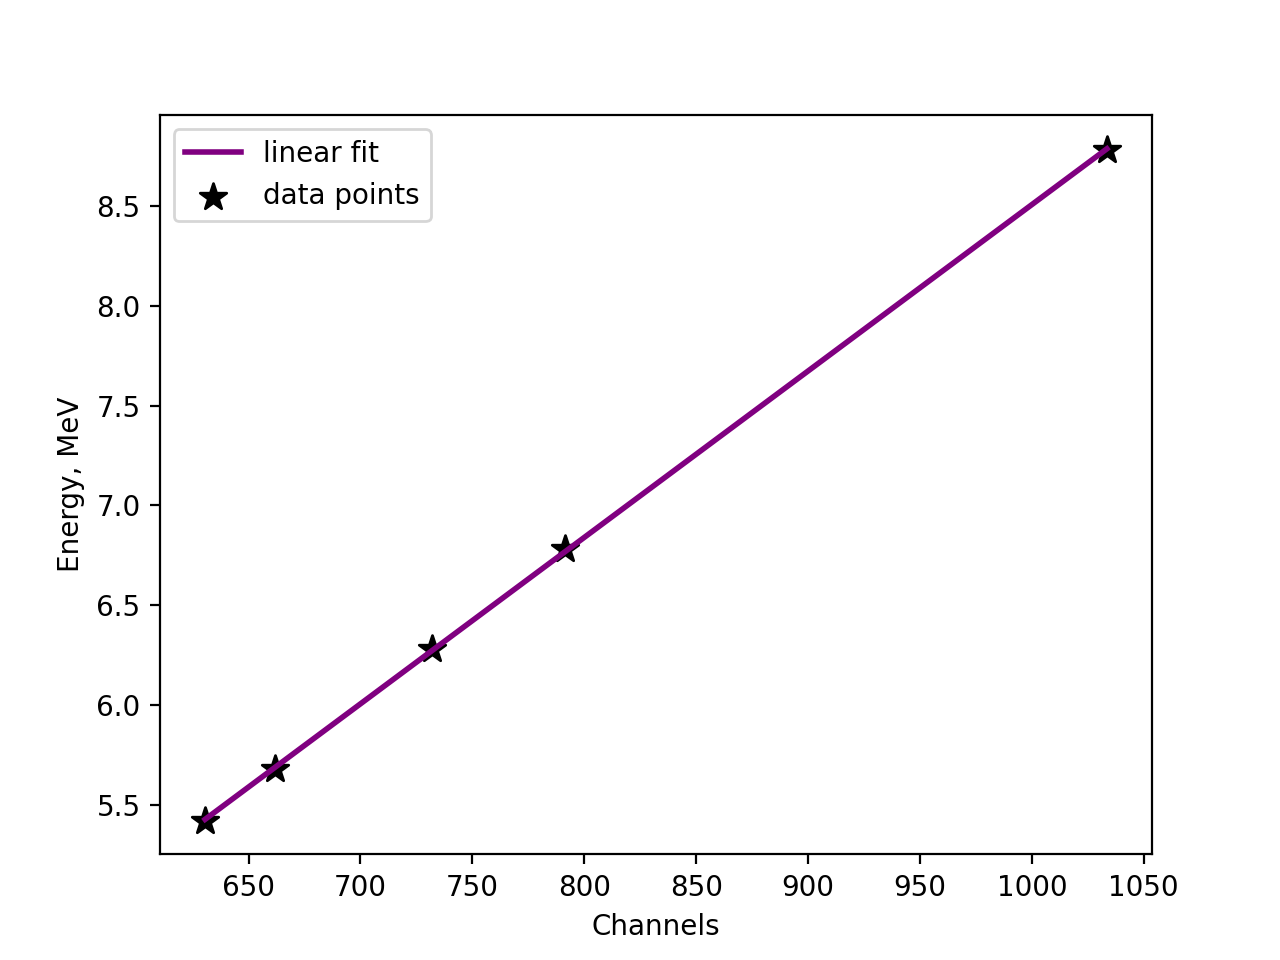

Estimated paramters (k, m) = (0.00834, 0.171)


In [23]:
#First, lets put in the relevant alpha energies
#Information can be found from 232Th-chart.pdf
Table_E_1 = np.asarray([5.42])           # -> TODO <- Insert energy [MeV] of the first peak
Table_E_2 = np.asarray([5.68])           # -> TODO <- Insert energy [MeV] of the second peak
Table_E_3 = np.asarray([6.28])           # -> TODO <- Insert energy [MeV] of the third peak
Table_E_4 = np.asarray([6.78])           # -> TODO <- Insert energy [MeV] of the fourth peak
Table_E_5 = np.asarray([8.78])           # -> TODO <- Insert energy [MeV] of the fifth peak


#### NO NEED TO EDIT ####
Table_E = np.concatenate([Table_E_1,Table_E_2,Table_E_3,Table_E_4,Table_E_5]) #put all energies into one container 'Table_E' for ease of use
mu_peak1 = np.asarray([first_peak.mu]) #save fitted centroid value
mu_peak2 = np.asarray([second_peak.mu]) #save fitted centroid value
mu_peak3 = np.asarray([third_peak.mu]) #save fitted centroid value
mu_peak4 = np.asarray([fourth_peak.mu]) #save fitted centroid value
mu_peak5 = np.asarray([fifth_peak.mu]) #save fitted centroid value

mu_calibration = np.concatenate([mu_peak1,mu_peak2,mu_peak3,mu_peak4,mu_peak5]) #put all fitted centroid values in one container 'mu_calibration' for ease of use

print(f'Alpha energies [MeV]: {Table_E}')
print(f'Fitted centroid values [ADC]: {mu_calibration}')
#########################

# Same as before, the linear function needs intial guess for the two paramters:
k_guess = 2 # -> intial guess for the slope of the curve
m_guess = 1 # -> initial guess for the intersection of the y-axis

#### NO NEED TO EDIT ####
# Perform the fit
estimates_NaI, covar_matrix = curve_fit(fittingFunctions.LineFunc, # name of the function - linear function in our case
                                        mu_calibration,            # our x data - peak centroids 
                                        Table_E,                   # our y data - energies
                                        p0 = [k_guess, m_guess])   # our initial guessesfor k and m parameters

k = estimates_NaI[0] #save fitted parameter 'k' 
m = estimates_NaI[1] #save fitted parameter 'm'
plt.figure() #make figure 
plt.plot(mu_calibration, fittingFunctions.LineFunc(mu_calibration, estimates_NaI[0], estimates_NaI[1]), color='purple', lw=2, label='linear fit') #plot the linear fit
plt.scatter(mu_calibration, Table_E, s=100, c='black', marker='*', label='data points') #plot the fitted data
plt.legend(loc='upper left') #set a legend and its position
plt.xlabel("Channels")       # set label for x-axis 
plt.ylabel("Energy, MeV")    # set label for y-axis 
plt.show()
print(f"Estimated paramters (k, m) = ({round(k, 5)}, {round(m, 5)})") #print the results of the fit to screen
#########################

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

### Step 10: Plot the calibrated data and check that the peaks have the correct energy.

In [24]:
#Execute to calibrate from ADC channels to Energy [MeV] for the two data sets.

#### NO NEED TO EDIT ####
Th228.calibrate(k,m) #calibrate the Th-228 spectra

#########################

<IPython.core.display.Javascript object>


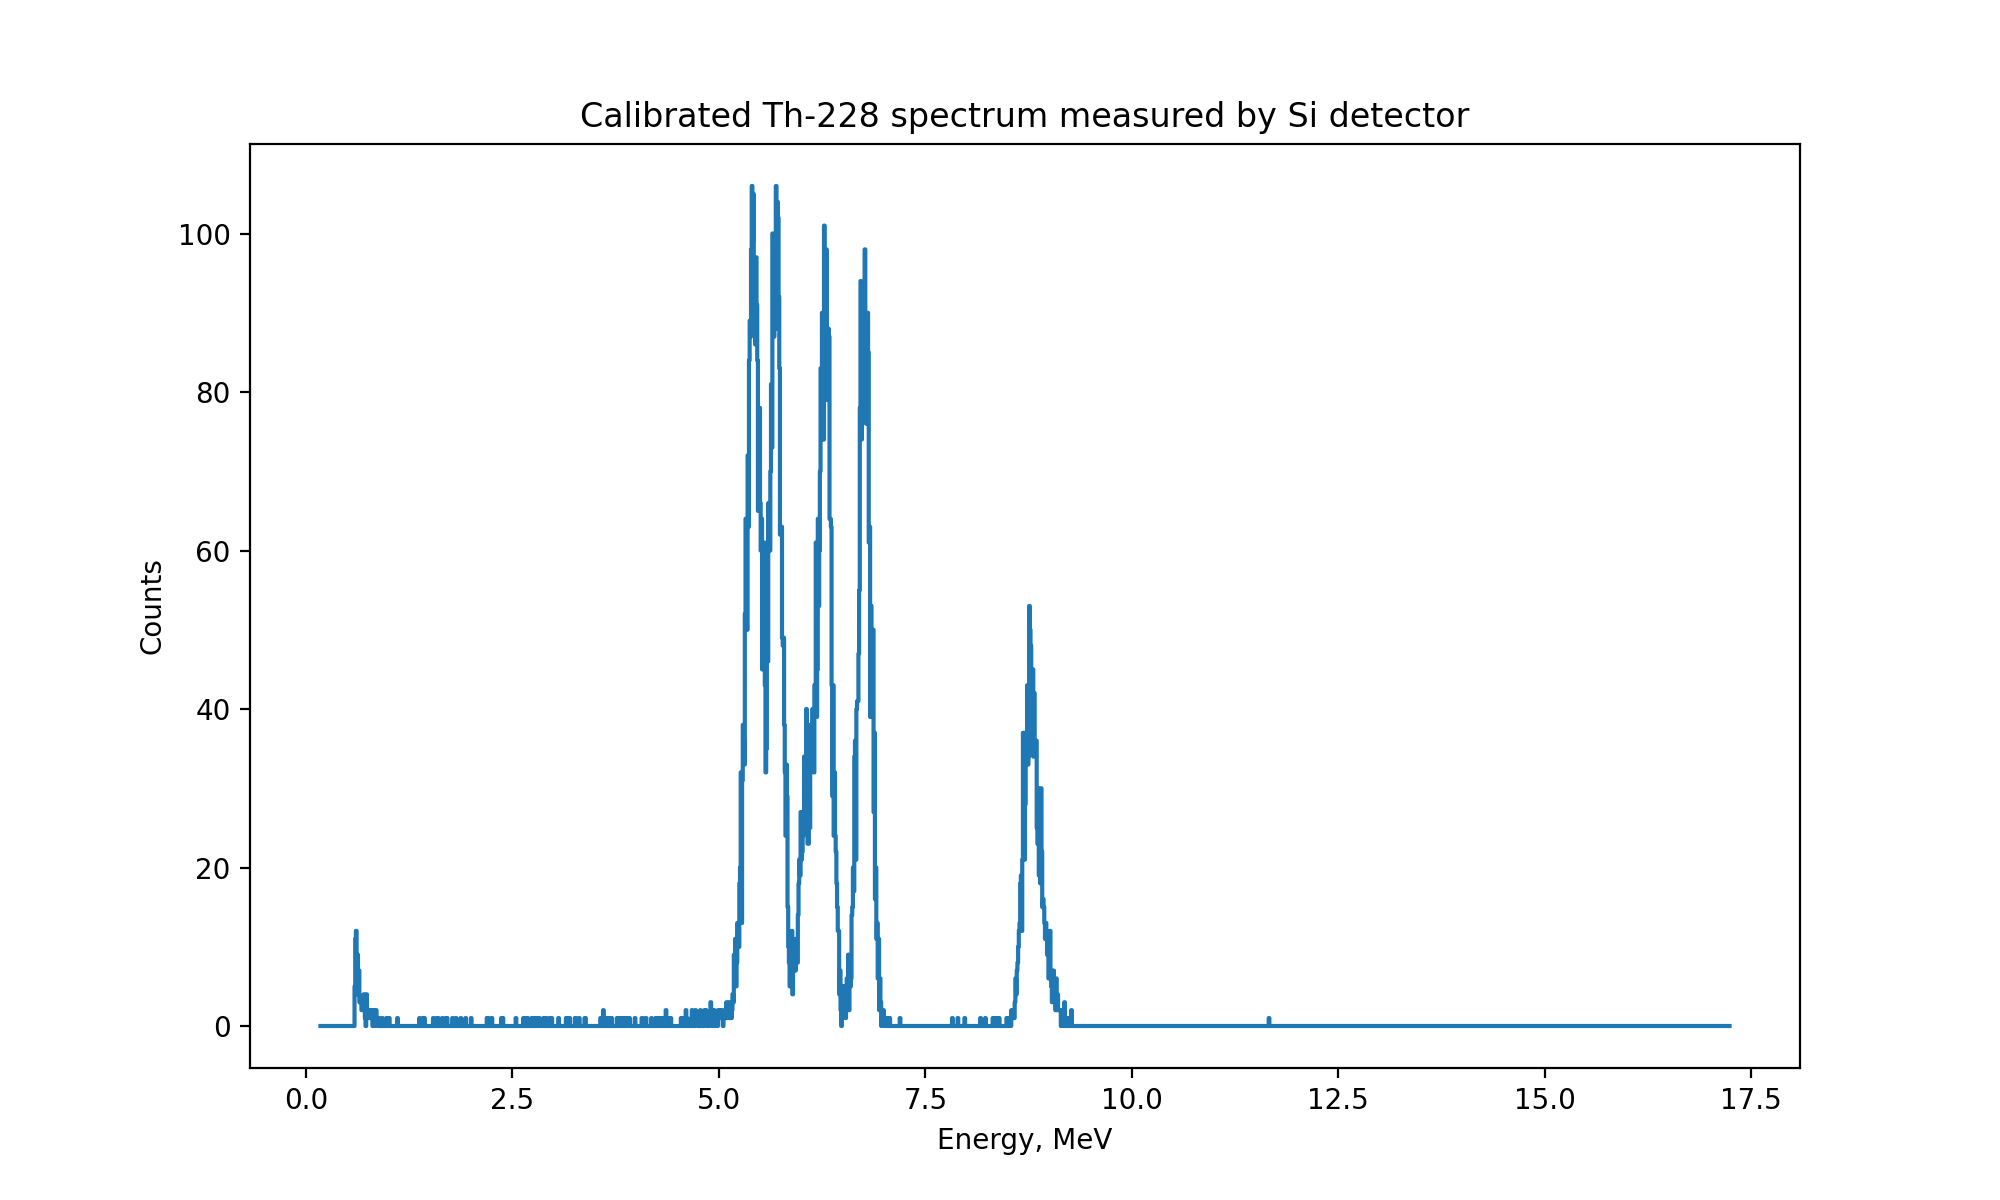

Text(0, 0.5, 'Counts')

In [25]:
#Execute to make plot of calibrated Th-228 spectra

#### NO NEED TO EDIT ####
plt.figure(figsize=(10, 6))
# with the data read in with the first routine
plt.step(Th228.energy, Th228.counts, where='mid', label='step')
plt.title("Calibrated Th-228 spectrum measured by Si detector") # set title of the plot
plt.xlabel("Energy, MeV")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("th228_calib_spectrum.png") #This is how you save the figure
#########################

## Task 2.3: Measure the concentration of radon gas

### Step 12: Read in the two measured spectra and calibrate

In [32]:
#Load your data files here:
Rn222_1 = MCA.load_spectrum("/Users/Yash/Downloads/radonconc1-160425.Spe") #-> TODO <- Insert the name of your data file. Source: Rn-222 ( first measurement)
Rn222_2 = MCA.load_spectrum("/Users/Yash/Downloads/radonocon2-160425.Spe") #-> TODO <- Insert the name of your data file. Source: Rn-222 (second measurement)

In [33]:
#Now we can use your previous calibration to calibrate this new spectra!

#### NO NEED TO EDIT ####
Rn222_1.calibrate(k, m)
Rn222_2.calibrate(k, m)
#########################

<IPython.core.display.Javascript object>


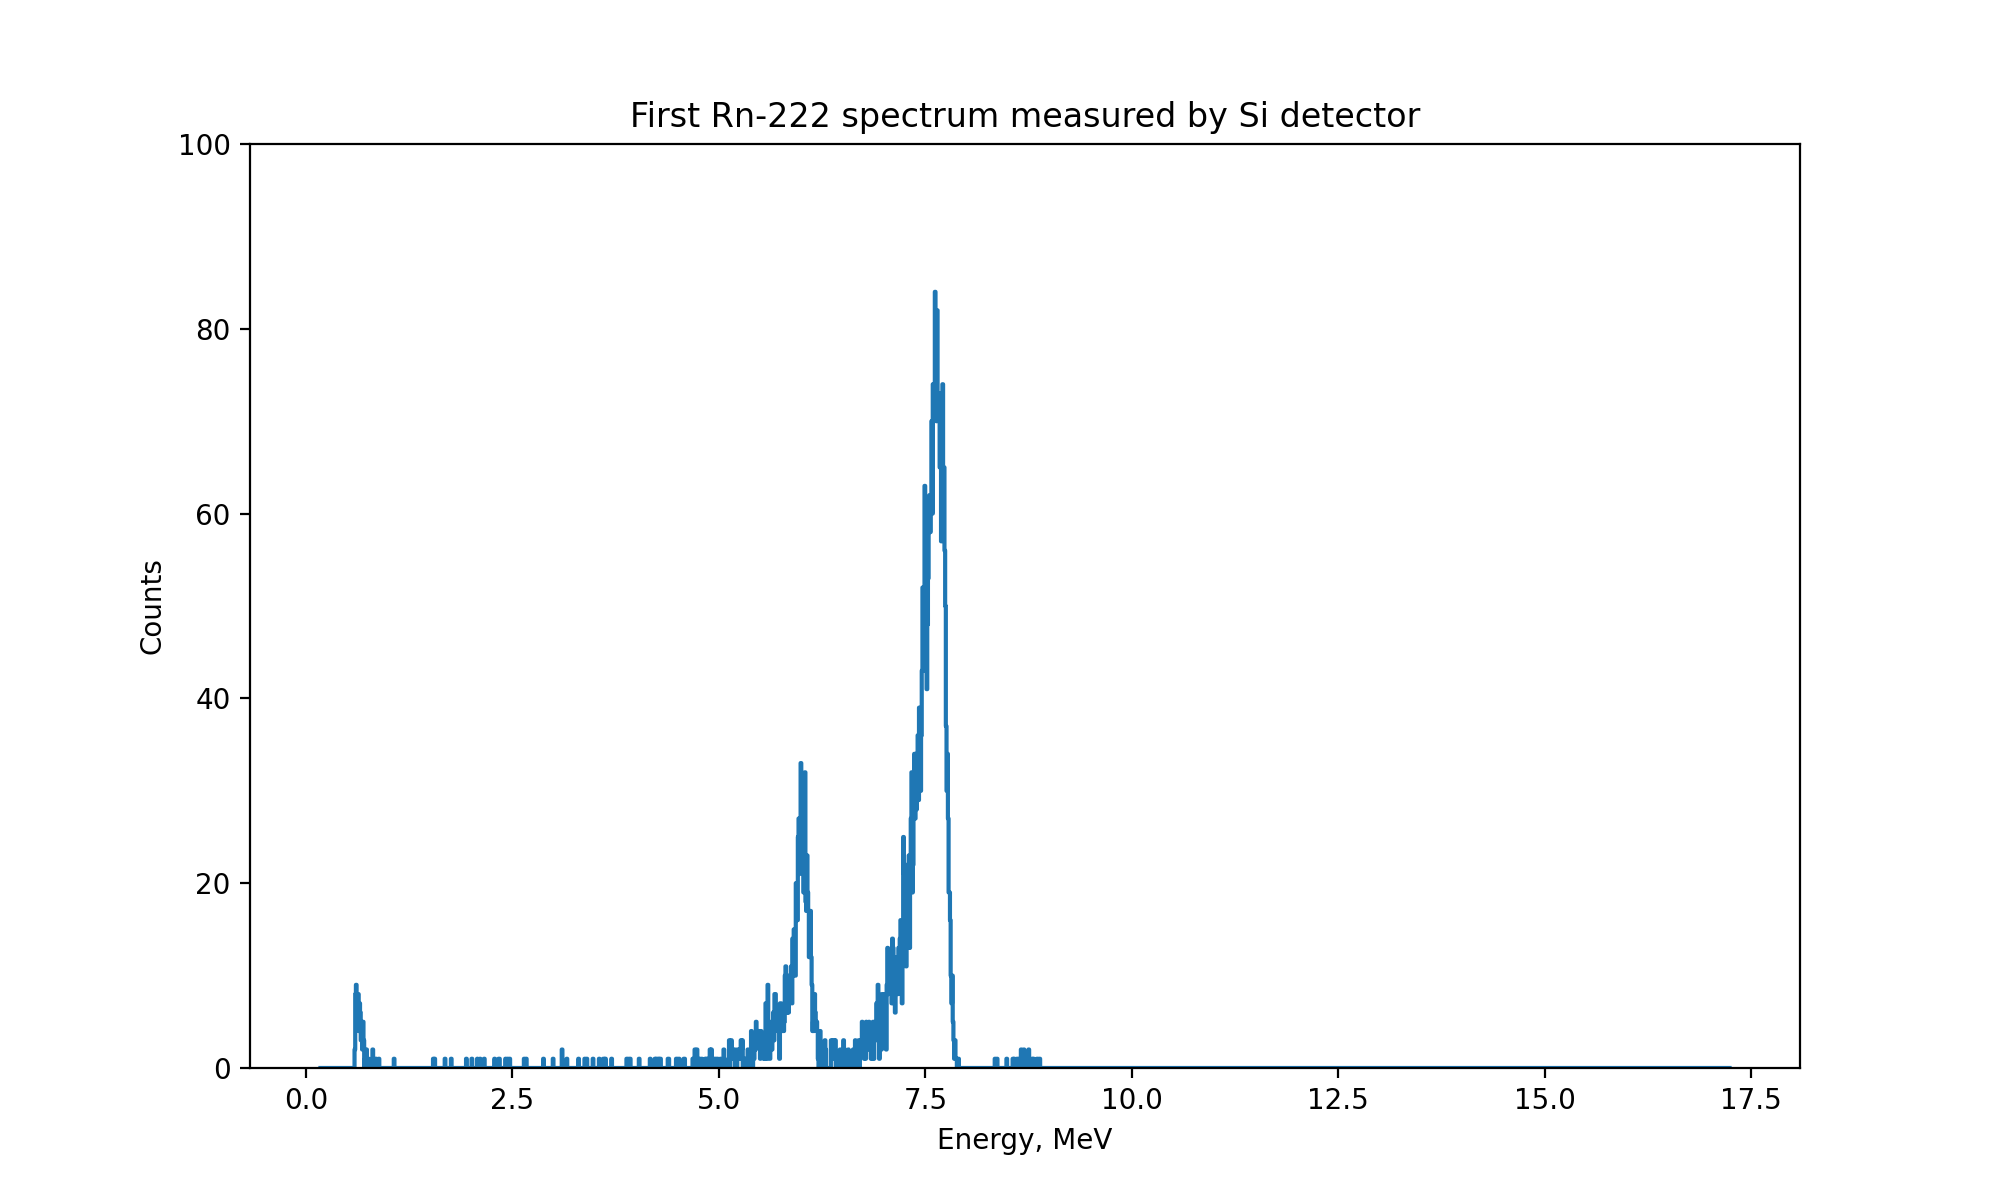

(0.0, 100.0)

In [34]:
#Exectute to make a plot of your first calibrated Rn-222 spectra.

#### NO NEED TO EDIT ####
plt.figure(figsize=(10, 6)) #make figure
# with the data read in with the first routine
plt.step(Rn222_1.energy, Rn222_1.counts, where='mid', label='First Measurement')

plt.title("First Rn-222 spectrum measured by Si detector") # set title of the plot
plt.xlabel("Energy, MeV")  # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.ylim(ymin=0, ymax=100) #-> TODO <- Might need to tune the axis scale [counts]
#plt.savefig("test_spectrum.png") #This is how you save the figure
#########################

### Step 13: Determine the counts of each peak

<IPython.core.display.Javascript object>


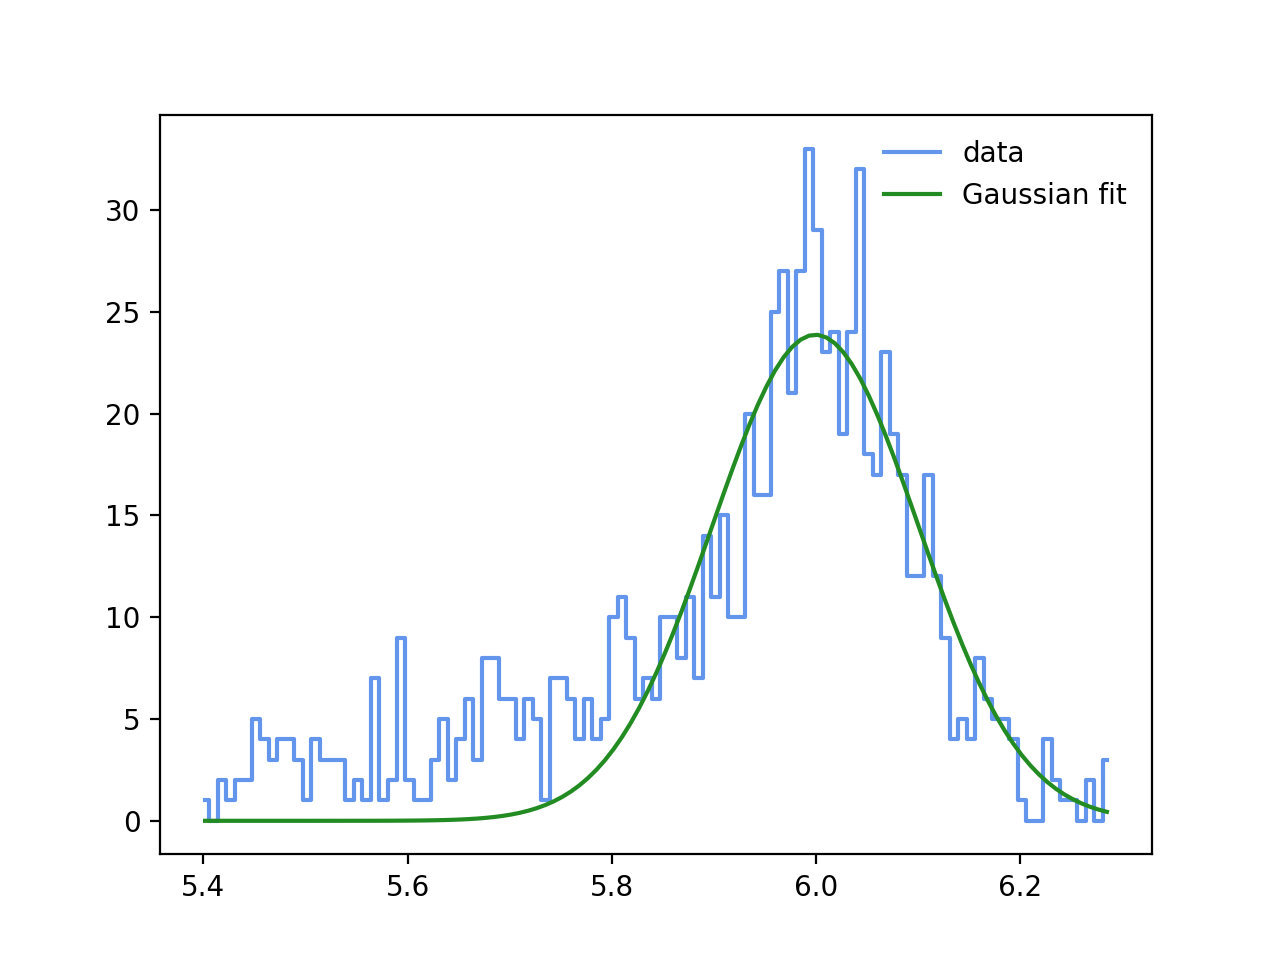

Estimated parameters:
 A = 23.87000, mu = 5.99960,  sigma = 0.10105 

Uncertainties in the estimated parameters: 
 σ²(A) = 1.03607, σ²(mu) = 0.00002, σ²(sigma) = 0.00002 

Covariance matrix: 
 [[ 1.03606797e+00 -3.40153605e-06 -2.93100064e-03]
 [-3.40153605e-06  2.47441882e-05  3.25334707e-08]
 [-2.93100064e-03  3.25334707e-08  2.48269269e-05]]

 Area (intensity) of the first peak : 604.6016605548698


In [42]:
# Fitting the 1st peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
Rn222_1_peak1 = fittingFunctions.perform_Gaussian_fit(x=Rn222_1.energy, # your x data 
                                              y=Rn222_1.counts,           # your y data 
                                              region_start=5.40,   # -> TODO <- Insert energy [MeV] from where to START fitting.
                                              region_stop=6.29,    # -> TODO <- Insert energy [MeV] from where to STOP fitting.
                                              mu_guess=6,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
                                              A_guess=33,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
                                              sigma_guess=0.3)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

bins = 100 # bins per unit of x axis
print("\n Area (intensity) of the first peak : {}".format(Rn222_1_peak1.area()*bins))

<IPython.core.display.Javascript object>


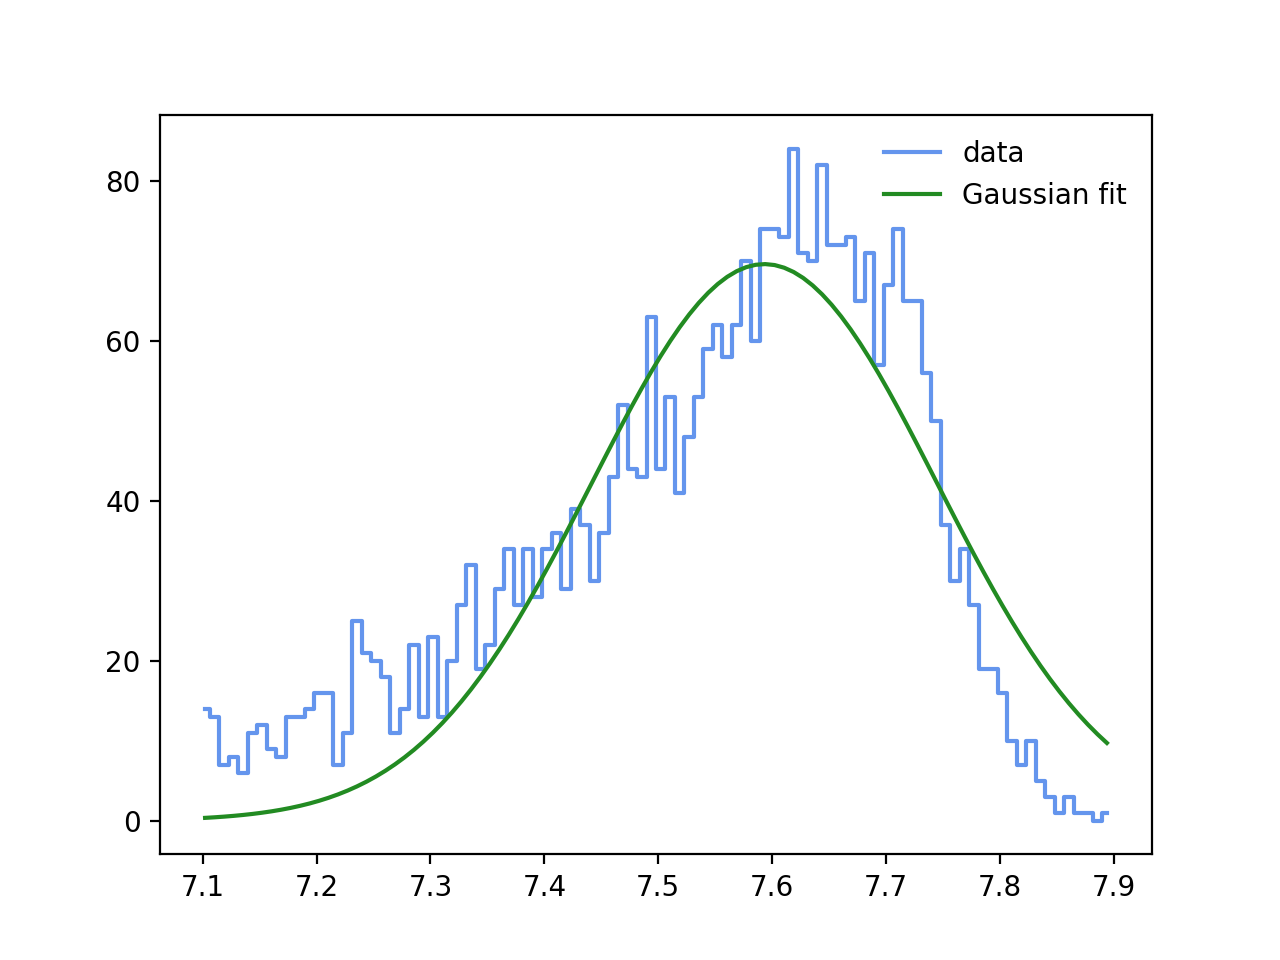

Estimated parameters:
 A = 69.59015, mu = 7.59325,  sigma = 0.15162 

Uncertainties in the estimated parameters: 
 σ²(A) = 5.33331, σ²(mu) = 0.00003, σ²(sigma) = 0.00004 

Covariance matrix: 
 [[ 5.33331196e+00 -2.99687843e-04 -8.20916260e-03]
 [-2.99687843e-04  3.38653497e-05  1.67361885e-06]
 [-8.20916260e-03  1.67361885e-06  3.65168224e-05]]

 Area (intensity) of the second peak : 2644.7486250814572


In [45]:
# Fitting the 2nd peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
Rn222_1_peak2 = fittingFunctions.perform_Gaussian_fit(x=Rn222_1.energy, # your x data 
                                              y=Rn222_1.counts,           # your y data 
                                              region_start= 7.1,   # -> TODO <- Insert energy [MeV] from where to START fitting.
                                              region_stop= 7.9,    # -> TODO <- Insert energy [MeV] from where to STOP fitting.
                                              mu_guess=7.68,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
                                              A_guess=85,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
                                              sigma_guess=0.3)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.

bins = 100 # bins per unit of x axis
print("\n Area (intensity) of the second peak : {}".format(Rn222_1_peak2.area()*bins))

<IPython.core.display.Javascript object>


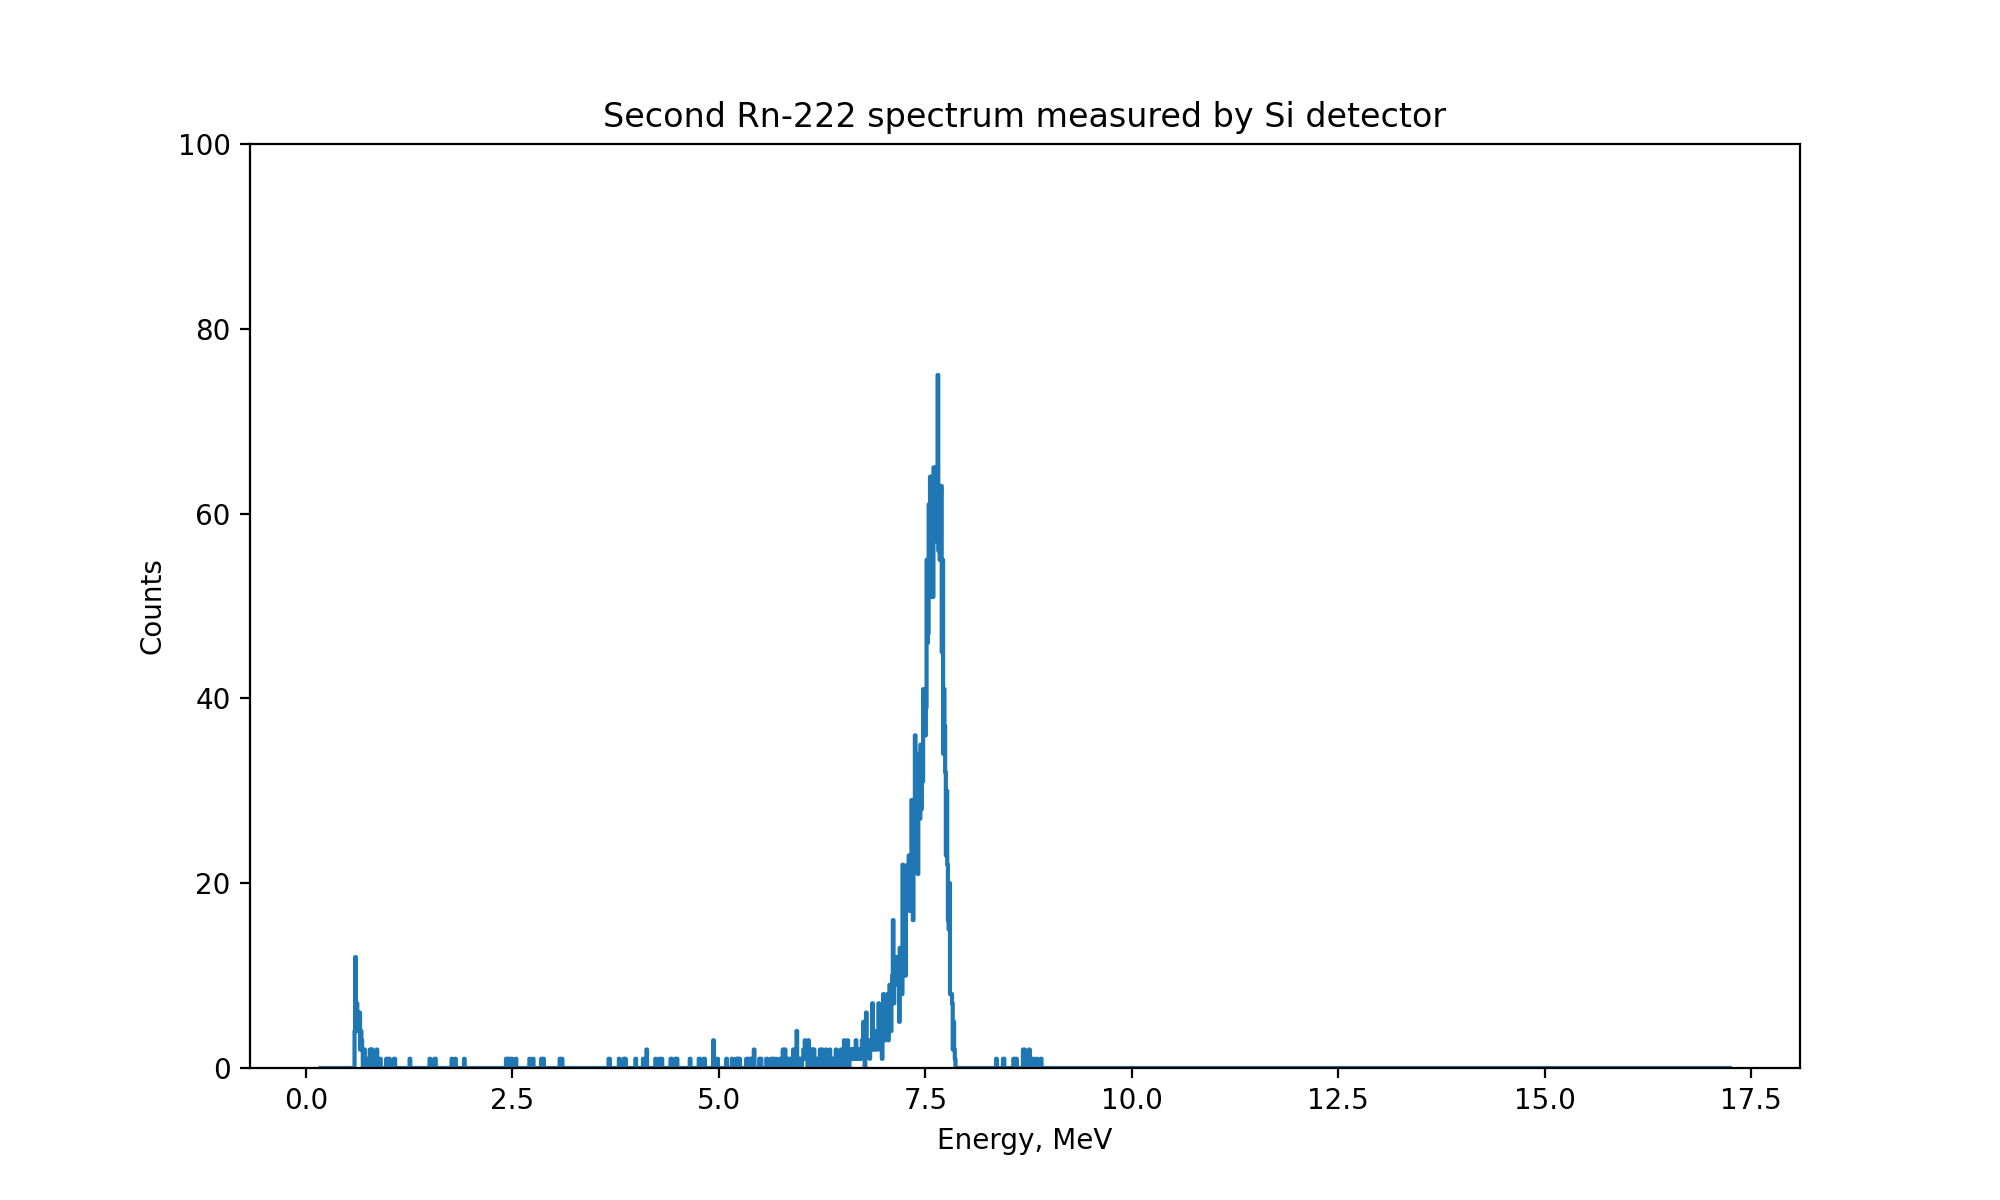

(0.0, 100.0)

In [44]:
#Exectute to make a plot of your second calibrated Rn-222 spectra.

#### NO NEED TO EDIT ####
plt.figure(figsize=(10, 6)) #make figure
# with the data read in with the first routine
plt.step(Rn222_2.energy, Rn222_2.counts, where='mid', label='step')

plt.title("Second Rn-222 spectrum measured by Si detector") # set title of the plot
plt.xlabel("Energy, MeV")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
plt.ylim(ymin= 0, ymax=100) #-> TODO <- Might need to tune the axis scale [Counts]
#plt.savefig("test_spectrum.png") #This is how you save the figure
#########################

<IPython.core.display.Javascript object>


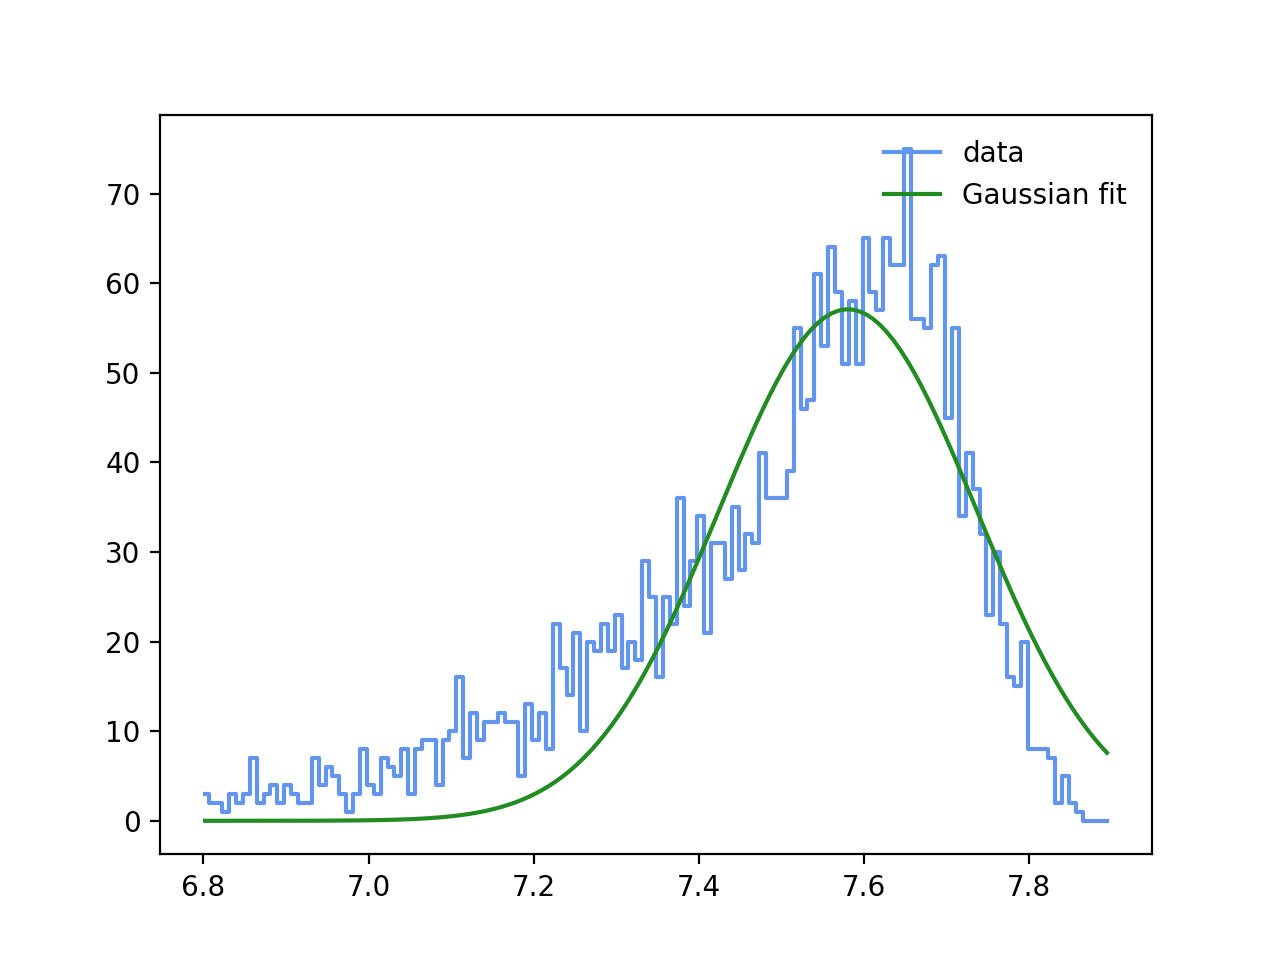

Estimated parameters:
 A = 57.09155, mu = 7.58037,  sigma = 0.15616 

Uncertainties in the estimated parameters: 
 σ²(A) = 3.26122, σ²(mu) = 0.00003, σ²(sigma) = 0.00003 

Covariance matrix: 
 [[ 3.26122288e+00 -2.13598289e-04 -6.27659990e-03]
 [-2.13598289e-04  3.26131767e-05  1.48834718e-06]
 [-6.27659990e-03  1.48834718e-06  3.49907479e-05]]

 Area (intensity) of the second peak : 2234.822990833512


In [50]:
# Fitting the 2nd peak:

# In order to make a fit the software needs an intial guess of the parameters of the gaussian.
Rn222_2_peak2 = fittingFunctions.perform_Gaussian_fit(x=Rn222_2.energy, # your x data 
                                              y=Rn222_2.counts,           # your y data 
                                              region_start=6.8,   # -> TODO <- Insert energy [MeV] from where to START fitting.
                                              region_stop=7.9,    # -> TODO <- Insert energy [MeV] from where to STOP fitting.
                                              mu_guess=7.61,       # -> TODO <- Insert intial guess of peak centroid (mean value of the peak)
                                              A_guess=76,        # -> TODO <- Insert intial guess for the constant 'A' (amplitude of the peak)
                                              sigma_guess=0.3)    # -> TODO <- Insert intial guess for the standard diviation (width of the peak)

#After executing this cell (Shift + Enter) the fitted parameters can be seen below the plot.
bins = 100 # bins per unit of x axis
print("\n Area (intensity) of the second peak : {}".format(Rn222_2_peak2.area()*bins))

### Step 14: Calculate the concentration of radium decay products in collected sample 

Radium-226 decays into Radon-222 which is gaseous, this in turns decays and it is these decay products that pose a health risk

Historically these products were called RaA(Po-218), RaB(Pb-214), RaC(Bi-214), RaC'(Po-214). This is mentioned only to help should you want to try and follow the following calculation in detail as those suffixes were used to simplify variable naming

Section 1.5.5 in Nuclear physics : principles and applications - J.S. Lilley will help in understanding the following code.

In broad strokes, it is taking the known half lives and calculating how much of it is collected, how much decays in that time and then how the successive decay products feed into each other using the so-called Bateman equations.

The code is complicated, and not written in the most elegant way, but has been included for completeness, all the variables to be edited are above the `#### NO NEED TO EDIT ####`

In [52]:
collection_time = 154   #-> TODO <- Insert your timing [s]
transfer_time = 72     #-> TODO <- Insert your timing [s]
measurement_1_time = 300 #-> TODO <- Insert your timing [s]
decay_time = 600        #-> TODO <- Insert your timing [s]
measurement_2_time = 300 #-> TODO <- Insert your timing [s]

pump_flow = 14*60          #-> TODO <- Insert your value [l/h] 

N_A1 = 604.6016605548698  #-> TODO <- Insert the contents/integral of first  peak from first measurment
N_C1 = 2644.7486250814572  #-> TODO <- Insert the contents/integral of second peak from first measurment
N_C2 = 2234.822990833512  #-> TODO <- Insert the contents/integral of first  peak from second measurement

#### NO NEED TO EDIT ####
efficiency = 0.31
flow = pump_flow/1000/3600 # m3/s
t1_start = transfer_time
t1_stop = t1_start+measurement_1_time
t2_start = t1_stop+decay_time
t2_stop = t2_start+measurement_2_time
#relevant half lives
Po218_hl = 183  # [s]
Pb214_hl = 1608 # [s]
Bi214_hl = 1182 # [s]
#decay constants
lamda_A = np.log(2)/Po218_hl
lamda_B = np.log(2)/Pb214_hl
lamda_C = np.log(2)/Bi214_hl
#accumulated amounts
acc_A = 1-np.exp(-lamda_A*collection_time)
acc_B = 1-np.exp(-lamda_B*collection_time)
acc_C = 1-np.exp(-lamda_C*collection_time)
#fractional decay of components during measurment one
decay_A_1 = np.exp(-lamda_A*t1_start) - np.exp(-lamda_A*(t1_stop))
decay_B_1 = np.exp(-lamda_B*t1_start) - np.exp(-lamda_B*(t1_stop))
decay_C_1 = np.exp(-lamda_C*t1_start) - np.exp(-lamda_C*(t1_stop))                                                   
#fractional decay of components during measurment two
decay_A_2 = np.exp(-lamda_A*t2_start) - np.exp(-lamda_A*t2_stop)
decay_B_2 = np.exp(-lamda_B*t2_start) - np.exp(-lamda_B*t2_stop)
decay_C_2 = np.exp(-lamda_C*t2_start) - np.exp(-lamda_C*t2_stop)

Term12A = 1/lamda_B * (1/lamda_B * lamda_C/(lamda_C - lamda_B) * decay_B_1 * acc_B)
Term12B = 1/lamda_B * 1/lamda_C * lamda_B/(lamda_B - lamda_C) * decay_C_1 * acc_C 

Term13A_1 = 1/lamda_A * (1/lamda_A * lamda_B/(lamda_B - lamda_A) * lamda_C/(lamda_C - lamda_A) * decay_A_1 * acc_A )
Term13B_1 = 1/lamda_A * 1/lamda_B * lamda_A/(lamda_A-lamda_B) * lamda_C/(lamda_C-lamda_B) * decay_B_1 * acc_B 
Term13C_1 = 1/lamda_A * 1/lamda_C * lamda_A/(lamda_A-lamda_C) * lamda_B/(lamda_B-lamda_C) * decay_C_1 * acc_C

Term13A_2 = 1/lamda_A * (1/lamda_A * lamda_B/(lamda_B - lamda_A) * lamda_C/(lamda_C - lamda_A) * decay_A_2 * acc_A )
Term13B_2 = 1/lamda_A * 1/lamda_B * lamda_A/(lamda_A-lamda_B) * lamda_C/(lamda_C-lamda_B) * decay_B_2 * acc_B 
Term13C_2 = 1/lamda_A * 1/lamda_C * lamda_A/(lamda_A-lamda_C) * lamda_B/(lamda_B-lamda_C) * decay_C_2 * acc_C

F11 = 1/lamda_C * 1/lamda_C * decay_C_1 * acc_C
F12 = 1/lamda_B * (1/lamda_B * lamda_C/(lamda_C - lamda_B) * decay_B_1 * acc_B + 1/lamda_C * lamda_B/(lamda_B-lamda_C) * decay_C_1 * acc_C)
F13 = Term13A_1 + Term13B_1 + Term13C_1

F21 = 1/lamda_C * 1/lamda_C * decay_C_2 * acc_C
F22 = 1/lamda_B * (1/lamda_B * lamda_C/(lamda_C - lamda_B) * decay_B_2 * acc_B + 1/lamda_C * lamda_B/(lamda_B-lamda_C) * decay_C_2 * acc_C)
F23 = Term13A_2 + Term13B_2 + Term13C_2

k_denom = F22 * F11 - F21 * F12
k_1 = 1/(flow * 1/lamda_A**2 * decay_A_1 * acc_A)
k_2 = k_1 * (F21 * F13 - F23 * F11)/k_denom
k_3 = -1/flow * F21/k_denom
k_4 = 1/flow * F11/k_denom
k_5 = k_1 * (F23 * F12 - F22 * F13)/k_denom
k_6 = 1/flow * F22/k_denom
k_7 = -1/flow * F12/k_denom

C_A = k_1 * N_A1/efficiency
C_B = (k_2 * C_A + k_3 * N_C1 + k_4 * N_C2)/efficiency
C_C = (k_5 * N_A1 + k_6 * N_C1 + k_7 * N_C2)/efficiency

print("Po-218 Activity =",C_A, "Bq/m^3")
print("Pb-214 Activity =",C_B, "Bq/m^3")
print("Bi-214 Activity =",C_C, "Bq/m^3")

Po-218 Activity = 524.9012470012992 Bq/m^3
Pb-214 Activity = 635.1222128793094 Bq/m^3
Bi-214 Activity = 826.2118313797978 Bq/m^3


**Question**: Why have some peaks dissapeared between the first and second measurement?


In [53]:
#### NO NEED TO EDIT ####

#Calculate the Equilibrium Equivalent Dose
Po218_E = 6.11
Pb214_E = 7.83
Bi214_E = 7.69 # actually energy of the proceeding 214Po decay as it's a beta decay followed quickly by alpha

# convert half life to lifetime and calculate amount of nuclei needed for 1Bq activity
potential_Po218 = Po218_hl/0.69 * (Po218_E+7.69) #second decay is short lived so included here
potential_Pb214 = Pb214_hl/0.69 * Pb214_E
potential_Bi214 = Bi214_hl/0.69 * Bi214_E

total_energy = potential_Po218+potential_Pb214+potential_Bi214 # MeV/Bq

#calculate activity concentrations
frac_Po218 = potential_Po218/total_energy
frac_Pb214 = potential_Pb214/total_energy
frac_Bi214 = potential_Bi214/total_energy


# weighting factors based on energy released per Bq of activity
C1 = frac_Po218
C2 = frac_Pb214
C3 = frac_Bi214

equilibrium_factor = 0.4 # value for indoors
#equilibrium_factor = 0.6 # value for outdoors

EEC = (C1 * C_A + C2 * C_B + C3 * C_C) / equilibrium_factor

print(EEC,"Bq/m^3")

1738.449509433864 Bq/m^3


The International Commission on Radiological Protection (ICRP)
Give a dose coefficient of  6.7 x 10^-6 mSv per Bq h m-3

**Question** Using this and the calculateed EEC, calculate the exposure over the course of one year should this be the air in your basement


In [54]:
time_indoors = 0.8 
Dose = 6.7/1000000 * EEC * 24*365*time_indoors
print(Dose,"mSv")

81.62646288615389 mSv


**Question** : How does this compare to the average background radiation in Sweden?

**Question**: What could be done to mitigate the risks involved?

# Part 3: Range of alpha particles in air

### Step 1: Determine the background 

In [13]:
## compute the background measurements

import numpy as np
from uncertainties import ufloat  # Import ufloat
from math import sqrt  # Import sqrt

#bg = [counts_BG_1, counts_BG_2, counts_BG_3] #-> TODO <- add coma separated values for the BG counts measured
bg = [12,21,17]

for i in range(0, len(bg)):
    bg[i] = ufloat(bg[i],sqrt(bg[i]))
bg = np.array(bg)
bg = np.average(bg)
print(f"Background counts {bg=:.2}")

# Time spent for each background measurement.
bkg_time = 60


Background counts bg=17+/-2


### Step 2: Measure the count of alpha particles from the source at various distances

It is known that the detector does not sit at $d_0=0\,\text{mm}$. For the sake of this measurements you can assume that the depth of the detector is $d_0=2.5\,\text{mm}$

The surface of the detector is quite sensitive so <font color='red'>DO NOT TRY TO MEASURE IT YOURSELVES.</font>


In [17]:
import pandas as pd

## Format d[mm], t(s), factor, exp.Counts #-> TODO <- add the counts measured for each distance
data = [
    [ 4.5,  60, 1.00, 5212],
    [ 6.5,  60, 1.51, 3552],
    [ 8.5,  60, 2.03, 2593],
    [10.5,  60, 3.00, 1884],
    [12.5,  60, 4.01, 1542],
    [14.5,  60, 5.20, 1148],
    [16.5,  60, 6.57, 1011],
    [18.5,  60, 8.12, 789],
    [20.5,  60, 9.84, 676],
    [22.5,  60, 11.7, 534],
    [24.5,  60, 13.8, 354],
    [26.5, 100, 16.1, 119],
    [28.5, 100, 18.5, 53],
    [30.5, 100, 21.1, 49],
    [32.5, 100, 24.3, 42]
]

## Turn into a dataframe using some identifying strings
s_distance=r'$d$[mm]'
s_time= r't(s)'
s_factor=r'$F_\Omega$'
s_counts_raw=r'Counts raw'

s_counts=r'Counts - BG'
s_counts_corrected=r'CPS corrected'
df = pd.DataFrame(data, columns=[s_distance, s_time, s_factor, s_counts_raw])

## Get the uncertainties into the Counts and substract the background
df[s_counts] = [ufloat(x,sqrt(x))- bg for x in df[s_counts_raw]]
df[s_counts_corrected] = df[s_counts]*(1/df[s_time])*df[s_factor]
display(df)

## uncomment the following to have the output copy and paste ready ;-)
print(df.to_latex(float_format="{:.6}".format, index=False, escape=False))

,$d$[mm],t(s),$F_\Omega$,Counts raw,Counts - BG,CPS corrected
0,4.5,60,1.00,5212,(5.20+/-0.07)e+03,86.6+/-1.2
1,6.5,60,1.51,3552,(3.54+/-0.06)e+03,89.0+/-1.5
2,8.5,60,2.03,2593,(2.58+/-0.05)e+03,87.2+/-1.7
3,10.5,60,3.00,1884,(1.87+/-0.04)e+03,93.4+/-2.2
4,12.5,60,4.01,1542,(1.53+/-0.04)e+03,101.9+/-2.6
5,14.5,60,5.20,1148,1131+/-34,98.0+/-2.9
6,16.5,60,6.57,1011,994+/-32,108.9+/-3.5
7,18.5,60,8.12,789,772+/-28,105+/-4
8,20.5,60,9.84,676,659+/-26,108+/-4
9,22.5,60,11.70,534,517+/-23,101+/-5


\begin{tabular}{rrrrll}
\toprule
 $d$[mm] &  t(s) &  $F_\Omega$ &  Counts raw &       Counts - BG & CPS corrected \\
\midrule
     4.5 &    60 &         1.0 &        5212 & (5.20+/-0.07)e+03 &    86.6+/-1.2 \\
     6.5 &    60 &        1.51 &        3552 & (3.54+/-0.06)e+03 &    89.0+/-1.5 \\
     8.5 &    60 &        2.03 &        2593 & (2.58+/-0.05)e+03 &    87.2+/-1.7 \\
    10.5 &    60 &         3.0 &        1884 & (1.87+/-0.04)e+03 &    93.4+/-2.2 \\
    12.5 &    60 &        4.01 &        1542 & (1.53+/-0.04)e+03 &   101.9+/-2.6 \\
    14.5 &    60 &         5.2 &        1148 &         1131+/-34 &    98.0+/-2.9 \\
    16.5 &    60 &        6.57 &        1011 &          994+/-32 &   108.9+/-3.5 \\
    18.5 &    60 &        8.12 &         789 &          772+/-28 &       105+/-4 \\
    20.5 &    60 &        9.84 &         676 &          659+/-26 &       108+/-4 \\
    22.5 &    60 &        11.7 &         534 &          517+/-23 &       101+/-5 \\
    24.5 &    60 &        13.8 &  

/var/folders/hz/mkz65x4x541fjbbbtbvhkfyh0000gn/T/ipykernel_1387/3001332496.py:38: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(float_format="{:.6}".format, index=False, escape=False))


Text(0, 0.5, 'CPS corrected')

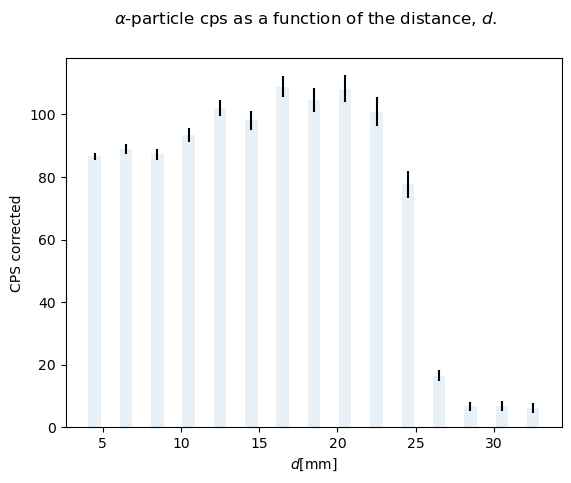

In [20]:
import matplotlib.pyplot as plt
import uncertainties.unumpy as unumpy
#                       y,x
fig, axs = plt.subplots(1,1)

fig.suptitle(r'$\alpha$-particle cps as a function of the distance, $d$.')
plt.bar(df[s_distance],
        unumpy.nominal_values(df[s_counts_corrected]),
        yerr=unumpy.std_devs(df[s_counts_corrected]),
        label='Exp.',
        alpha=0.1
       )
plt.xlabel(s_distance)
plt.ylabel(s_counts_corrected)

### Step 3: Compare the exp. value with the one from Bethe-Bloch and the parameterization

In [21]:
def Range_a_in_Air_Empirical(E):
    """
    E in [MeV] or alphas
    
    returns range [cm]
    """
    return 0.318*E**(3/2)

E = 5.48 # MeV
parameterized_range = Range_a_in_Air_Empirical(E)
print(f'Alpha of {E:.4} MeV has a range of {parameterized_range:.4} cm according to parameterization')

Alpha of 5.48 MeV has a range of 4.079 cm according to parameterization


<font color='red'> #-> TODO <- </font>

<font color='red'>THIS SECTION NEEDS TO BE DEVELOPED AS PART OF THE REPORT. IT DOES NOT RUN AS IS. 
    THIS IS JUST SOME SKELETON CODE</font>

From Lilley
$$
-\frac{dE}{dx} = \left(\frac{ze^2}{4\pi\epsilon_0}\right)^2\ \frac{4\pi Z\rho N_A}{Am_ev^2}\ \left[\ln{\left(\frac{2m_ev^2}{I}\right)} - \ln{\left(1-\beta^2\right)} - \beta^2\right]
$$

best coded as:

$$
-\frac{dE}{dx} = \left(\frac{e^2}{4\pi\epsilon_0}\right)^2\ 
\frac{4\pi z^2}{m_ec^2\beta^2}\ 
\frac{Z\rho N_A}{A}\ \left[\ln{\left(\frac{2m_ec^2\beta^2}{I}\right)} - \ln{\left(1-\beta^2\right)} - \beta^2\right]
$$

In [1]:
#-> TODO <-
#           Using a series of small distance steps (dx), using a loop find the energy loss (dE)
#           of an alpha particle until it is stopped => reaches an energy of 0.           
#           You can keep track the value of dE_dx in a list for plotting later

#-> TODO <-
#           Be creative and code what you need to get the range of an alpha particle.
#           Refer to the canvas page on Bethe-Bloch if you are unsure about your coding. 

import numpy as np
from scipy.integrate import quad

def Bethe_Bloch(E, z, A, Z, rho, I):
    """
    PLEASE CODE THIS YOURSELVES
    Projectile:
      - E[MeV] 
      - m0c2[MeV]
      - z
    Target:
      - A  [g/mol]
      - Z  [e]
      - rho[g/cm3]
      - I [MeV]
      
    SHOULD returns dE/dx in [MeV/cm] if you use the suggested units
    """

    N_A = 6.02214086e26 # molecules/kg-mole
    mec2 = 0.511        # MeV
    e2_4pi_e0 = 1.4400  # MeV*fm

    # let's do some unit tweaking
    N_A  /= 1000        # 1/g
    mec2 /= 1           # MeV
    e2_4pi_e0 /= 1e15   # MeV*m
    e2_4pi_e0 *= 100    # MeV*cm
    
    # Mean excitation potential (convert from eV to MeV)
    I_MeV = I * 1e-6  
    
    # Calculate beta and gamma
    m_alpha_c2 = 3727.0  # MeV
    gamma = E / m_alpha_c2 + 1
    beta = np.sqrt(1 - 1/(gamma**2))
   
     # Main Bethe-Bloch formula
     
    dE_dX = (e2_4pi_e0)**2 * (4 * np.pi * z**2) / (mec2 * beta**2) * (Z * rho * N_A) / A * np.log(2 * mec2 * beta**2 / I) - np.log(1 - beta**2) - beta**2
    
    return dE_dX

def alpha_range(Ei, Ef, z, A, Z, rho, I, nsteps=10000):

    energies = np.linspace(Ei, Ef, nsteps)
    integrand = []
    
    for E in energies:
        Denominator = Bethe_Bloch(E, z, A, Z, rho, I)
        integrand.append(1/Denominator)
    
    # Numerical integration
    range_cm = np.trapz(integrand, energies)
    
    return range_cm

# Air parameters (corrected)
A_air = 14.5  # g/mol
Z_air = 7.22  # Effective atomic number
rho_air = 1.225e-3  # g/cm³
I_air = 86  # eV

# Calculate range for 5.48 MeV alpha
range_cm = alpha_range(5.48, 0.001, z=2, A=A_air, Z=Z_air, rho=rho_air, I=I_air)
empirical = 0.318 * 5.48**1.5

print(f"Bethe-Bloch range: {range_cm:.2f} cm")
print(f"Empirical range: {empirical:.2f} cm")


Bethe-Bloch range: 1.00 cm
Empirical range: 4.08 cm


In [47]:
#### NO NEED TO EDIT ####
# turn those lists into array so we can do math with them =)
energy = np.array(energy)
brag = np.array(brag) # it was in MeV/um
brag*=1e6             # now in eV/cm. If changed, also change the label below

#plt.plot(step, energy, label='Energy [MeV]')
plt.plot(step[:-1], brag*1e6, label=r'for an initial $E_\alpha$={E} MeV')
plt.legend(loc='upper left')
plt.xlabel(r'Depth ($\mu m$)')
plt.ylabel(r'$\frac{dE}{dX}$ $[eV/\mu m]$', size=20)
#plt.savefig("bethe_bloch.svg")
#### NO NEED TO EDIT ####

NameError: name 'energy' is not defined

### Step 4: Gold thickness

In [ ]:
#-> TODO <-
#           Be creative and code what you need to get the range of an alpha particle.
#           Refer to the canvas page on Bethe-Bloch if you are unsure about your coding.